In [1]:
# data https://datamarket.com/data/set/22w6/portland-oregon-average-monthly-bus-ridership-100-january-1973-through-june-1982-n114#!ds=22w6&display=line

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns

import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

bus = pd.read_csv('https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/example-lessons/Intro-to-forecasting/portland-oregon-average-monthly-.csv', index_col=0)
bus.index.name=None
bus.reset_index(inplace=True)
bus.head()

/Users/elutins/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,index,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [2]:
bus.tail()

,index,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
111,1969-04,1432
112,1969-05,1394
113,1969-06,1327
114,NaN,NaN
115,Portland Oregon average monthly bus ridership ...,n=114


In [3]:
bus.drop(bus.index[115], inplace=True)
bus.drop(bus.index[114], inplace=True)

In [5]:
start = datetime.datetime.strptime("1973-01-01", "%Y-%m-%d")
date_list = [start + relativedelta(months=x) for x in range(0,114)] # edited to 115
bus['index'] =date_list
bus.set_index(['index'], inplace=True)
bus.index.name=None

print len(date_list)  # check
len(bus.index)   # check

114


114

In [6]:
bus.head()

,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
1973-01-01,648
1973-02-01,646
1973-03-01,639
1973-04-01,654
1973-05-01,630


/Users/elutins/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:25: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/elutins/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:26: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


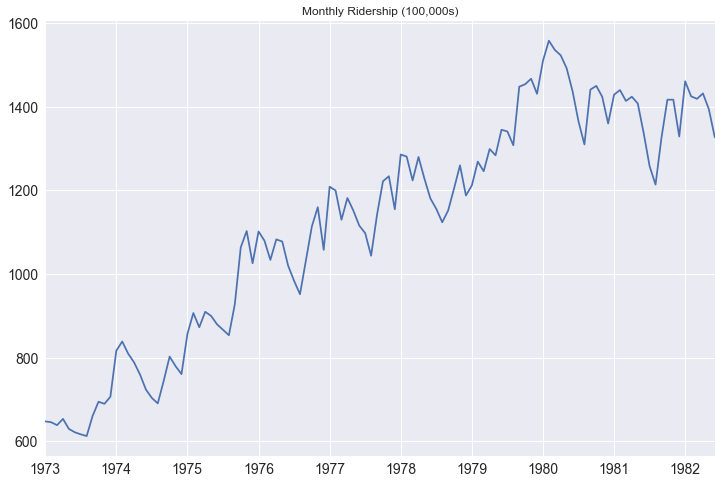

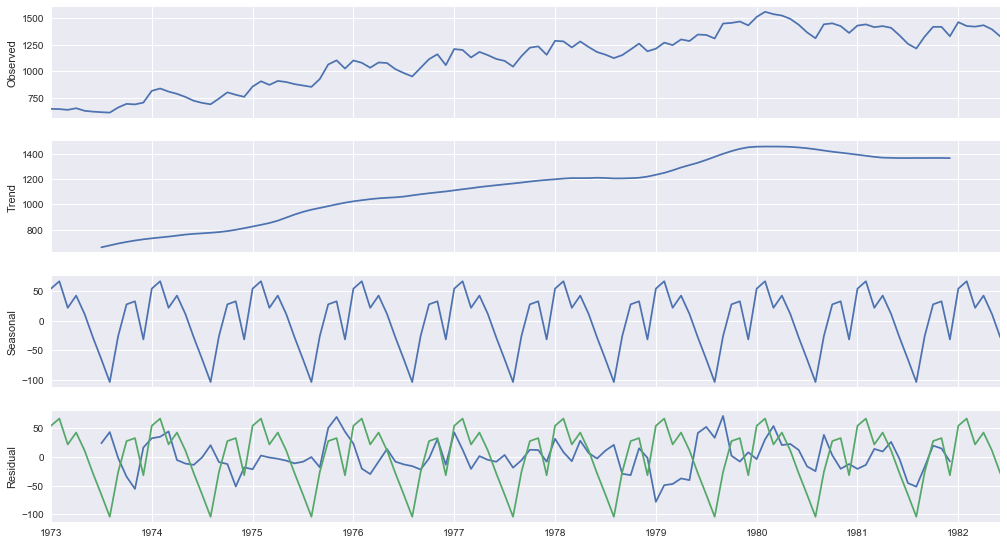

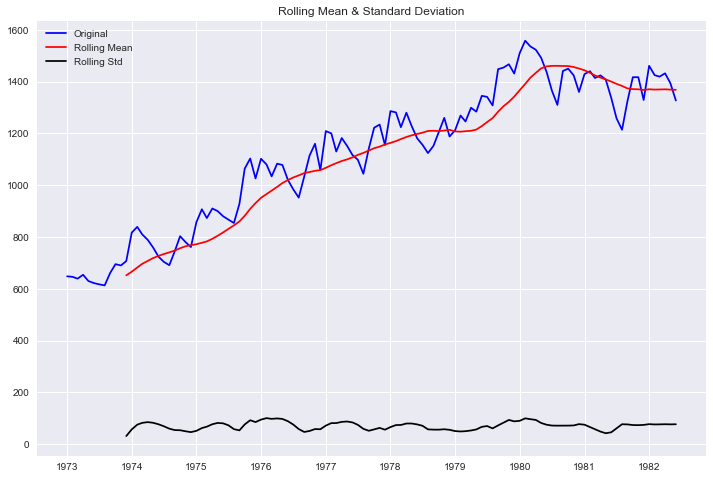

Results of Dickey-Fuller Test:
Test Statistic                  -1.536597
p-value                          0.515336
#Lags Used                      12.000000
Number of Observations Used    101.000000
Critical Value (5%)             -2.890611
Critical Value (1%)             -3.496818
Critical Value (10%)            -2.582277
dtype: float64


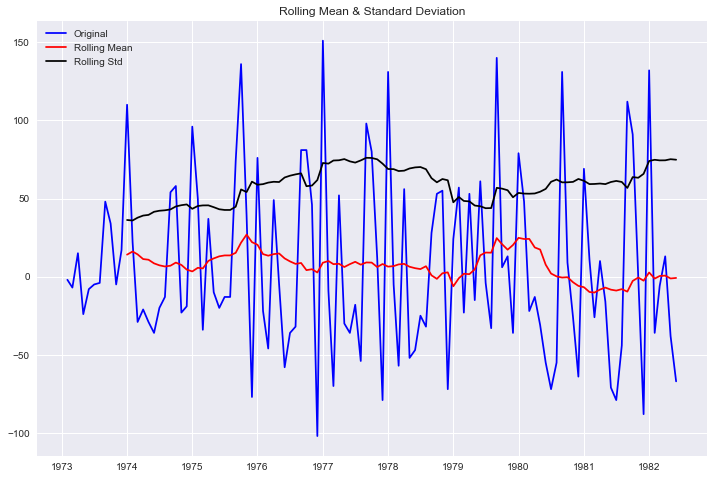

Results of Dickey-Fuller Test:
Test Statistic                  -1.938696
p-value                          0.314082
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (5%)             -2.890611
Critical Value (1%)             -3.496818
Critical Value (10%)            -2.582277
dtype: float64


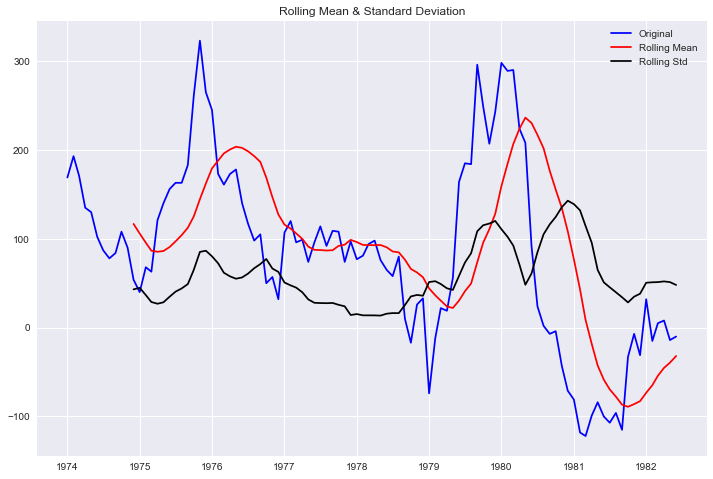

Results of Dickey-Fuller Test:
Test Statistic                 -2.469741
p-value                         0.123011
#Lags Used                      3.000000
Number of Observations Used    98.000000
Critical Value (5%)            -2.891516
Critical Value (1%)            -3.498910
Critical Value (10%)           -2.582760
dtype: float64


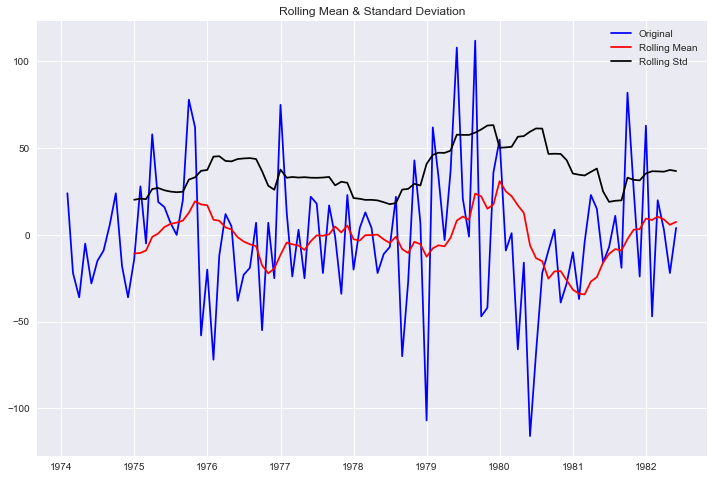

Results of Dickey-Fuller Test:
Test Statistic                -9.258520e+00
p-value                        1.427874e-15
#Lags Used                     0.000000e+00
Number of Observations Used    1.000000e+02
Critical Value (5%)           -2.890906e+00
Critical Value (1%)           -3.497501e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


In [7]:
# riders
bus.columns= ['riders']
# df['riders'] = df.riders.apply(lambda x: int(x)*100)
bus['riders'] = bus.riders.apply(lambda x: int(x))
bus.riders

bus.riders.plot(figsize=(12,8), title= 'Monthly Ridership (100,000s)', fontsize=14)
# plt.savefig('month_ridership.png', bbox_inches='tight')   # optional save

decomposition = seasonal_decompose(bus.riders, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
# plt.savefig('seasonal.png', bbox_inches='tight')   # optional save

# grab just one graphic doing the following:
seasonal = decomposition.seasonal 
seasonal.plot()

# define Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput 

# perform test
test_stationarity(bus.riders)

# first difference
bus['first_difference'] = bus.riders - bus.riders.shift(1)  
test_stationarity(bus.first_difference.dropna(inplace=False))

# seasonal difference
bus['seasonal_difference'] = bus.riders - bus.riders.shift(12)  
test_stationarity(bus.seasonal_difference.dropna(inplace=False))

# first seasonal difference
bus['seasonal_first_difference'] = bus.first_difference - bus.first_difference.shift(12)  
test_stationarity(bus.seasonal_first_difference.dropna(inplace=False))


# Source (but cleaned):
# https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb